In [1]:
import numpy as np
from array import array
import os
import sys
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle

Welcome to JupyROOT 6.22/02


Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/PRISM-TKI/Flux_NDGAr_PRISM_0m/Check_Enumu_0m.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/PRISM-TKI/Flux_NDGAr_PRISM_0m/Check_Enue_0m.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/PRISM-TKI/Flux_NDGAr_PRISM_0m/Check_Enumubar_0m.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/PRISM-TKI/Flux_NDGAr_PRISM_0m/Check_Enuebar_0m.png has been created


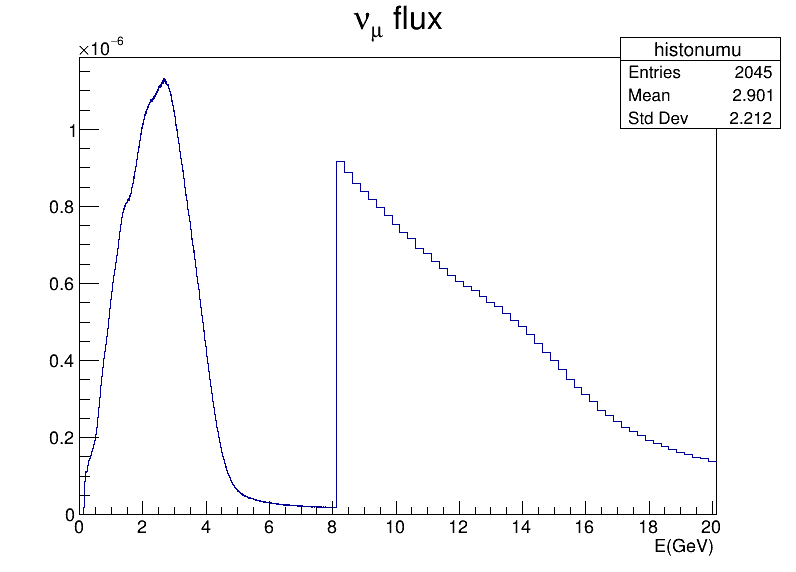

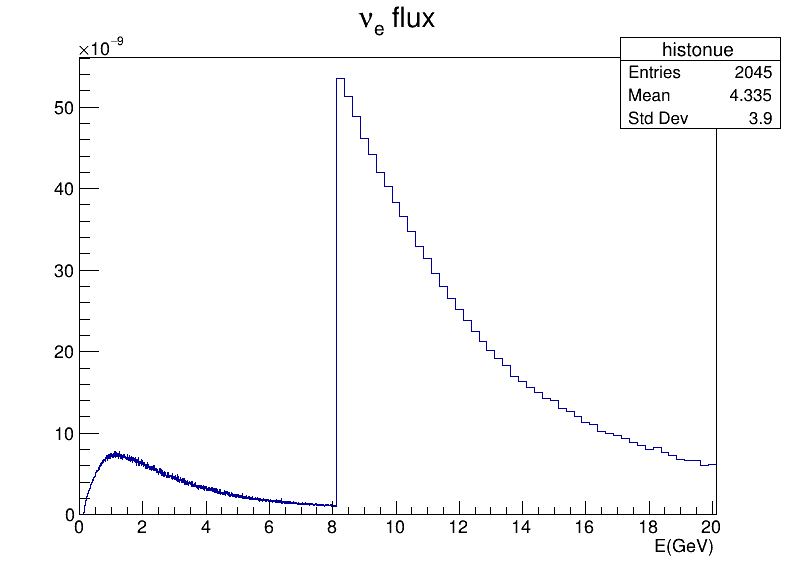

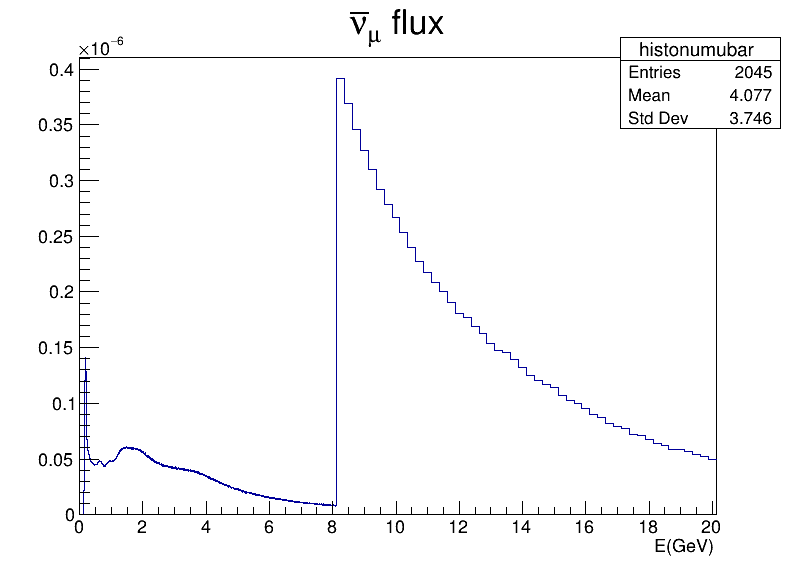

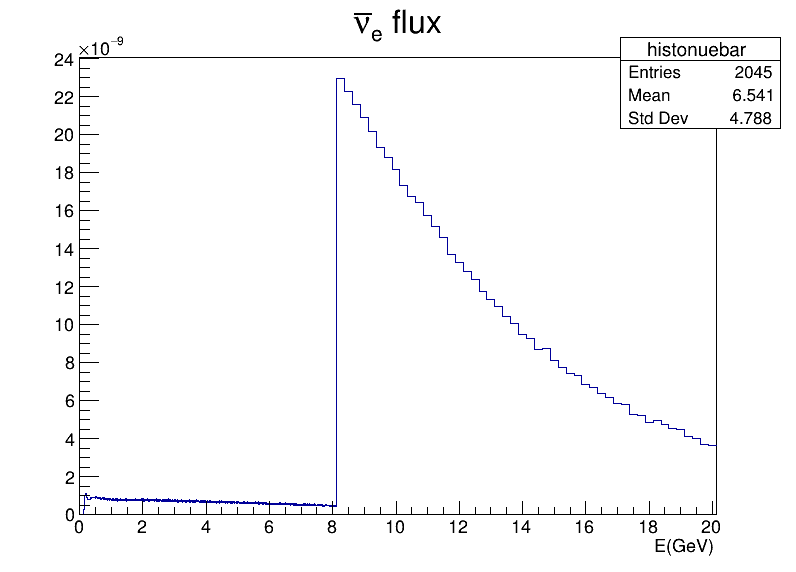

In [2]:
edge = [0.0]
nue = []
numu = []
nuebar = []
numubar = []

nbins=0

offaxis = "0m"
Folder = "/home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/PRISM-TKI/"
Flux = "Flux_NDGAr_PRISM_"
Flux = Flux+offaxis

with open(Folder+Flux+"/"+Flux+".dat") as fp:
    for line in fp:
        wholeline = []
        wholeline.extend(float(item) for item in line.split())
        edge.append(wholeline[0]+0.125)
        nue.append(wholeline[1])
        numu.append(wholeline[2])
        nuebar.append(wholeline[4])
        numubar.append(wholeline[5])
        nbins+=1


hnumu = ROOT.TH1F("histonumu","histonumu",nbins,array('d',edge))
hnue = ROOT.TH1F("histonue","histonue",nbins,array('d',edge))
hnumubar = ROOT.TH1F("histonumubar","histonumubar",nbins,array('d',edge))
hnuebar = ROOT.TH1F("histonuebar","histonuebar",nbins,array('d',edge))

for i in range(nbins-1):
    hnumu.SetBinContent(i+1,numu[i])
    hnue.SetBinContent(i+1,nue[i])
    hnumubar.SetBinContent(i+1,numubar[i])
    hnuebar.SetBinContent(i+1,nuebar[i])

#for i in range(hnumu.GetNbinsX()-1): hnumu.SetBinContent(i+1,hnumu.GetBinContent(i+1)/hnumu.GetBinWidth(i+1))  
#for i in range(hnue.GetNbinsX()-1): hnue.SetBinContent(i+1,hnue.GetBinContent(i+1)/hnue.GetBinWidth(i+1))  
#for i in range(hnuebar.GetNbinsX()-1): hnuebar.SetBinContent(i+1,hnuebar.GetBinContent(i+1)/hnuebar.GetBinWidth(i+1))  
#for i in range(hnumubar.GetNbinsX()-1): hnumubar.SetBinContent(i+1,hnumubar.GetBinContent(i+1)/hnumubar.GetBinWidth(i+1)) 

hnumu.GetXaxis().SetRangeUser(0,20)
hnue.GetXaxis().SetRangeUser(0,20)
hnumubar.GetXaxis().SetRangeUser(0,20)
hnuebar.GetXaxis().SetRangeUser(0,20)

cEnumu = ROOT.TCanvas("Enumu","Enumu",800,600)
hnumu.SetTitle("#nu_{#mu} flux;E(GeV);")
hnumu.Draw()
cEnumu.Draw()
save=Folder+Flux+"/Check_Enumu_"+offaxis+".png"
cEnumu.Print(save)

cEnue = ROOT.TCanvas("Enue","Enue",800,600)
hnue.SetTitle("#nu_{e} flux;E(GeV);")
hnue.Draw()
cEnue.Draw()
save=Folder+Flux+"/Check_Enue_"+offaxis+".png"
cEnue.Print(save)

cEnumub = ROOT.TCanvas("Enumub","Enumub",800,600)
hnumubar.SetTitle("#bar{#nu}_{#mu} flux;E(GeV);")
hnumubar.Draw()
cEnumub.Draw()
save=Folder+Flux+"/Check_Enumubar_"+offaxis+".png"
cEnumub.Print(save)

cEnueb = ROOT.TCanvas("Enueb","Enueb",800,600)
hnuebar.SetTitle("#bar{#nu}_{e} flux;E(GeV);")
hnuebar.Draw()
cEnueb.Draw()
save=Folder+Flux+"/Check_Enuebar_"+offaxis+".png"
cEnueb.Print(save)

